In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tbdistr = pd.read_csv("../Outcome Measurement Data/TUBERCULOSIS/GTM-TB-distribution-2013-2017.csv", 
                      index_col = "Unnamed: 0")

In [4]:
tbdistr.head()

,Program,Product,Supplier,Department,Year,Month,Ammount,MG,Medicine,ML,code_dept
0,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,1,0.0,300,ISONIAZIDA,0.0,16
1,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,2,2740.0,300,ISONIAZIDA,0.0,16
2,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,3,0.0,300,ISONIAZIDA,0.0,16
3,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,4,0.0,300,ISONIAZIDA,0.0,16
4,PROGRAMA NACIONAL DE TUBERCULOSIS,"ISONIAZIDA, TABLETA DE 300 MG.","RESCO, SOCIEDAD ANONIMA/ OPS",ALTA VERAPAZ,2013,5,3376.0,300,ISONIAZIDA,0.0,16


In [5]:
tbdistr.Product.value_counts()

RIFAMPICINA SUSPENSION 100MG/5ML., FRASCO DE 120 ML.         1740
ISONIAZIDA, TABLETA DE 100 MG.                               1740
KANAMICINA, VIAL DE 1 GRAMO                                  1740
ETHIONAMIDA, COMPRIMIDO DE 250 MG.                           1740
LEVOFLOXACINA, COMPRIMIDO DE 250 MG.                         1740
ETAMBUTOL, TABLETA DE 400 MG.                                1740
ISONIAZIDA, TAB LETA DE 300 MG.                              1392
CLOFAZIMINE, CAPSULA DE 50 MG.                               1392
PIRAZINAMIDA, TABLET DE 500 MG.                              1392
RIFAMPICINA, TABLETA DE 300 MG.                              1044
AMOXICILINA/ACIDO CLAVULANICO, COMPRIMIDO DE 875MG/125MG.    1044
CICLOCERINA, CAPSULA DE 250 MG.                              1044
MOXIFLOXACINA, TABLETA DE 400 MG.                            1044
CICLOSERINA, CAPSULA DE 250 MG.                               696
RIFAMPICINA, CAPSULA DE 300 MG.                               696
TUBERCULIN

In [12]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1168716/
# https://www.nature.com/articles/nrdp201676/tables/4
# https://www.sciencedirect.com/science/article/pii/S1201971216312103
# https://www.intechopen.com/books/tuberculosis-current-issues-in-diagnosis-and-management/first-and-second-line-drugs-and-drug-resistance
drugclass = pd.DataFrame(data = [
    ["RIFAMPICINA", "FIRSTLINE"],
    ["ISONIAZIDA", "FIRSTLINE"],
    ["ETHIONAMIDA", "SECONDLINE"],
    ["PIRAZINAMIDA", "FIRSTLINE"],
    ["TUBERCULINA", "DX"],
    ["KANAMICINA", "SECONDLINE"],
    ["LEVOFLOXACINA", "SECONDLINE"],
    ["ETAMBUTOL", "FIRSTLINE"],
    ["CLOFAZIMINE", "SECONDLINE"],
    ["AMOXICILINA/ACIDO CLAVULANICO", "MDR"],
    ["CICLOCERINA", "SECONDLINE"],
    ["ESTREPTOMICINA", "FIRSTLINE"],
    ["MOXIFLOXACINA", "SECONDLINE"],
    ["ACIDO PARAAMINOSALICILICO", "SECONDLINE"],
    ["CAPREOMICINA", "SECONDLINE"],
    ["LINEZOLID", "SECONDLINE"],
    ["IMIPENEM/CILASTATINA", "MDR"]
], columns= ["drug", "class"])

In [14]:
tbdistr = tbdistr.merge(drugclass, left_on="Medicine", right_on = "drug", how="outer")

In [15]:
tbdistr.columns

Index(['Program', 'Product', 'Supplier', 'Department', 'Year', 'Month',
       'Ammount', 'MG', 'Medicine', 'ML', 'code_dept', 'drug', 'class'],
      dtype='object')

In [43]:
tbdistrAgg = tbdistr.groupby(["code_dept", "class", "Year"]).Ammount.sum().reset_index()

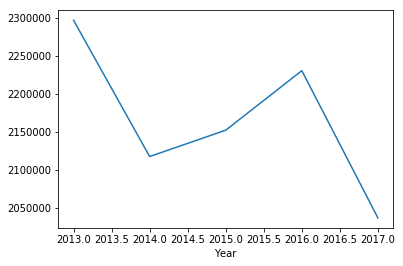

In [48]:
tbdistrAgg[tbdistrAgg["class"]=="FIRSTLINE"].groupby("Year").Ammount.sum().plot()
plt.title("")